<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>

In this project, we aim to predict the language/country of a name based on a dataset of names from different countries. To achieve this, we will use Recurrent Neural Networks (RNNs) to infer the nationality of a name by observing its characters.

In [ ]:
# !pip install keras --upgrade
# Uncomment the above line if you don't have keras 3 installed

In [1]:
import numpy as np
import pandas as pd

import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
print(keras.__version__)

2.15.0


The dataset for this project consists of a series of text files. Inside the <code>train</code> folder, you will find several text files with a .txt extension. The name of each file indicates the language/nationality of the names contained within that file, and each line in the corresponding file contains a single name. Additionally, the file <code>test.csv</code> contains a list of names for which you need to predict the nationality using your model.

In [4]:
! find . -name ".DS_Store" -delete

df = pd.DataFrame(columns=['Origin','Name'])
dirname = '/content/drive/MyDrive/new_born/data/train'
filenames = [f for f in os.listdir(dirname)]
for filename in filenames:
    file = open(f'{dirname}/{filename}', 'r')
    Lines = file.readlines()
    for line in Lines:
        df.loc[len(df)] = [filename[:-4], line.strip()]

In [5]:
test = pd.read_csv('/content/drive/MyDrive/new_born/data/test.csv')

In [6]:
chars = set()
for word in df['Name']:
    chars.update(word)

In [7]:
longest_string = df['Name'].str.len().max()

In [8]:
def encode(my_word, chars = chars, max_len = longest_string):
    char_indices = dict((c, i) for i, c in enumerate(chars))
    x = np.zeros((max_len, len(chars)))
    for i, c in enumerate(my_word):
        x[i, char_indices[c]] = 1
    return x

In [9]:
X = []
for j, word in enumerate(df['Name']):
    X.append(encode(word, chars, longest_string))
X = np.array(X)

In [10]:
test_x = []
for j, word in enumerate(test['Name']):
    test_x.append(encode(word, chars, longest_string))

test_x = np.array(test_x)

In [11]:
y = pd.get_dummies(df['Origin'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Input, LSTM, BatchNormalization, GRU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [14]:
model = Sequential()
model.add(GRU(units=256, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=y.shape[1], activation='sigmoid'))

model.compile(optimizer= Adam(),
			  loss='categorical_crossentropy',
              metrics = ['AUC'])

In [15]:
epochs = 120 # You can change it
batch_size = 1024 # You can change it

history = model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_valid,y_valid))

Epoch 1/120
18/18 [==============================] - 21s 1s/step - loss: 2.4562 - auc: 0.8142 - val_loss: 2.1479 - val_auc: 0.8741
Epoch 2/120
18/18 [==============================] - 16s 871ms/step - loss: 1.9171 - auc: 0.8678 - val_loss: 1.8420 - val_auc: 0.8807
Epoch 3/120
18/18 [==============================] - 15s 856ms/step - loss: 1.8084 - auc: 0.8800 - val_loss: 1.7897 - val_auc: 0.8809
Epoch 4/120
18/18 [==============================] - 15s 870ms/step - loss: 1.7673 - auc: 0.8823 - val_loss: 1.7381 - val_auc: 0.8805
Epoch 5/120
18/18 [==============================] - 15s 853ms/step - loss: 1.6900 - auc: 0.8803 - val_loss: 1.6469 - val_auc: 0.8746
Epoch 6/120
18/18 [==============================] - 18s 993ms/step - loss: 1.6174 - auc: 0.8727 - val_loss: 1.6047 - val_auc: 0.8686
Epoch 7/120
18/18 [==============================] - 15s 843ms/step - loss: 1.5712 - auc: 0.8703 - val_loss: 1.5776 - val_auc: 0.8644
Epoch 8/120
18/18 [==============================] - 15s 866ms/st

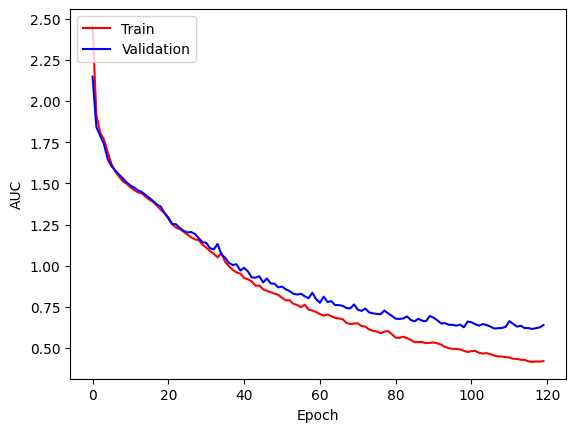

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
y_pred = model.predict(test_x)

32/32 [==============================] - 2s 28ms/step


In [19]:
submission = pd.DataFrame(y_pred.argmax(axis=1) , columns = ['prediction'])
submission

,prediction
0,1
1,14
2,0
3,14
4,16
...,...
999,9
1000,14
1001,14
1002,4
